In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet('../datasets/clean.parquet')

In [3]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,Unnamed: 0,IATA Code,ICAO Code,Air Carrier Name
0,1,2,9E,3280,11953,GNV,10397,ATL,601.0,0,0600-0659,300.0,8,9E,EDV,Endeavor Air
1,1,2,9E,3281,13487,MSP,11193,CVG,1359.0,0,1400-1459,596.0,8,9E,EDV,Endeavor Air
2,1,2,9E,3282,11433,DTW,11193,CVG,1215.0,0,1200-1259,229.0,8,9E,EDV,Endeavor Air
3,1,2,9E,3283,15249,TLH,10397,ATL,1521.0,0,1500-1559,223.0,8,9E,EDV,Endeavor Air
4,1,2,9E,3284,10397,ATL,11778,FSM,1847.0,0,1900-1959,579.0,8,9E,EDV,Endeavor Air


In [5]:
df.drop(columns=['Unnamed: 0', 'IATA Code', 'ICAO Code'], inplace=True)

In [6]:
df.sample(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,Air Carrier Name
557962,31,4,YV,5929,11298,DFW,11612,EVV,2335.0,1,2000-2059,642.0,"Mesa Airlines, Inc."
1090418,28,2,9E,5136,11267,DAY,13487,MSP,1732.0,0,1700-1759,574.0,Endeavor Air
446453,25,5,WN,4289,13232,MDW,13198,MCI,2135.0,0,2100-2159,405.0,Southwest Airlines
771243,11,6,AA,2039,15304,TPA,11278,DCA,1322.0,0,1300-1359,814.0,American Airlines
385070,21,1,WN,1504,14771,SFO,10800,BUR,808.0,0,0800-0859,326.0,Southwest Airlines
932037,20,1,MQ,3738,11298,DFW,10713,BOI,1218.0,0,1200-1259,1272.0,Envoy Air
1059207,26,7,YV,6287,12266,IAH,10397,ATL,758.0,0,0800-0859,689.0,"Mesa Airlines, Inc."
512013,28,1,AS,67,12523,JNU,10299,ANC,2100.0,0,2000-2059,571.0,Alaska Airlines
1084443,27,1,AA,470,14107,PHX,14831,SJC,1429.0,0,1400-1459,621.0,American Airlines
133773,8,2,MQ,3470,11298,DFW,15016,STL,1618.0,0,1600-1659,550.0,Envoy Air


## Univariate Analysis

In [43]:
df.nunique()

DAY_OF_MONTH           31
DAY_OF_WEEK             7
OP_CARRIER             17
OP_CARRIER_FL_NUM    6997
ORIGIN_AIRPORT_ID     353
ORIGIN                353
DEST_AIRPORT_ID       353
DEST                  353
DEP_TIME             1440
DEP_DEL15               2
DEP_TIME_BLK           19
DISTANCE             1511
Air Carrier Name       17
dtype: int64

In [7]:
# How is the target variable (Departure Delay Indicator) distributed? What percentage of flights are delayed?
df['DEP_DEL15'].value_counts(normalize=True)

DEP_DEL15
0    0.845391
1    0.154609
Name: proportion, dtype: float64

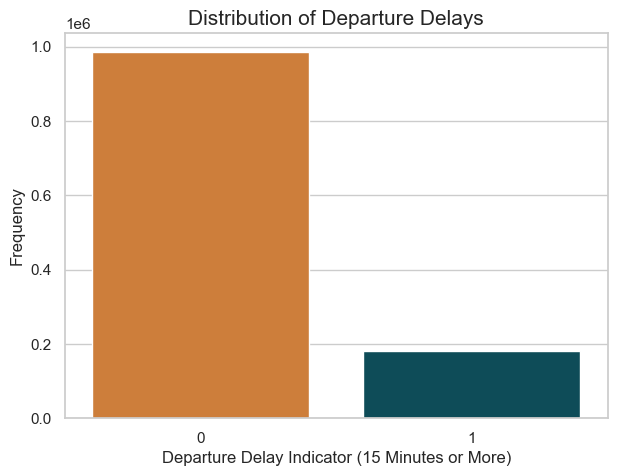

In [12]:
# plot the distribution of the target variable
plt.figure(figsize=(7, 5))

sns.countplot(x='DEP_DEL15', data=df, palette=['#E57C23',"#025464"])

plt.title('Distribution of Departure Delays', fontsize=15)
plt.xlabel('Departure Delay Indicator (15 Minutes or More)')
plt.ylabel('Frequency')
plt.show()


Check distribution of some features

<AxesSubplot:xlabel='DAY_OF_MONTH'>

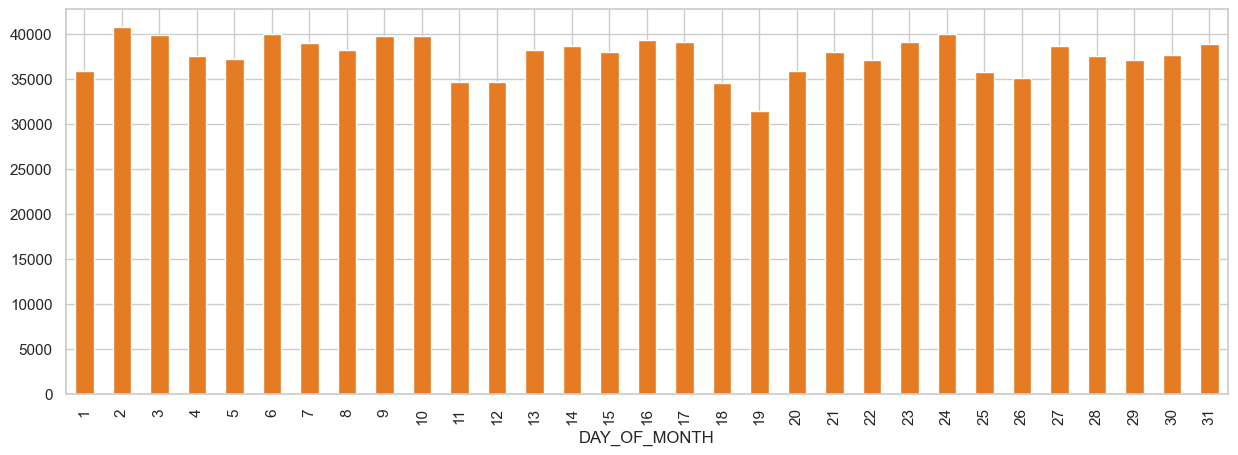

In [13]:
df['DAY_OF_MONTH'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5), color='#E57C23')

In [ ]:
# How are the numerical variables such as Day of Month, Day of Week, Distance between airports distributed?
# plot the distribution of the numerical variables


In [14]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,Air Carrier Name
0,1,2,9E,3280,11953,GNV,10397,ATL,601.0,0,0600-0659,300.0,Endeavor Air
1,1,2,9E,3281,13487,MSP,11193,CVG,1359.0,0,1400-1459,596.0,Endeavor Air
2,1,2,9E,3282,11433,DTW,11193,CVG,1215.0,0,1200-1259,229.0,Endeavor Air
3,1,2,9E,3283,15249,TLH,10397,ATL,1521.0,0,1500-1559,223.0,Endeavor Air
4,1,2,9E,3284,10397,ATL,11778,FSM,1847.0,0,1900-1959,579.0,Endeavor Air


In [19]:
df[['Air Carrier Name', 'ORIGIN', 'DEST']]

,Air Carrier Name,ORIGIN,DEST
0,Endeavor Air,GNV,ATL
1,Endeavor Air,MSP,CVG
2,Endeavor Air,DTW,CVG
3,Endeavor Air,TLH,ATL
4,Endeavor Air,ATL,FSM
...,...,...,...
1167672,Endeavor Air,TYS,DTW
1167673,Endeavor Air,DTW,JFK
1167674,Endeavor Air,GSP,LGA
1167675,Endeavor Air,ATL,XNA


In [32]:
mean_delay_carrier = df.groupby('Air Carrier Name')['DEP_DEL15'].mean().sort_values(ascending=False)
mean_delay_carrier

Air Carrier Name
Jetblue Airways Corporation    0.209495
Allegiant Air LLC              0.195611
Frontier Airlines, Inc.        0.193235
Envoy Air                      0.183060
Skywest Airlines               0.178295
Jetstream Intl                 0.171419
ExpressJet Airlines            0.168094
Alaska Airlines                0.161373
Mesa Airlines, Inc.            0.161056
United Airlines, Inc.          0.154216
American Airlines              0.152551
Southwest Airlines             0.148063
Endeavor Air                   0.147401
Republic Airlines              0.145213
Spirit Airlines, Inc.          0.141101
Delta Air Lines, Inc.          0.114287
Hawaiian Airlines Inc.         0.082700
Name: DEP_DEL15, dtype: float64

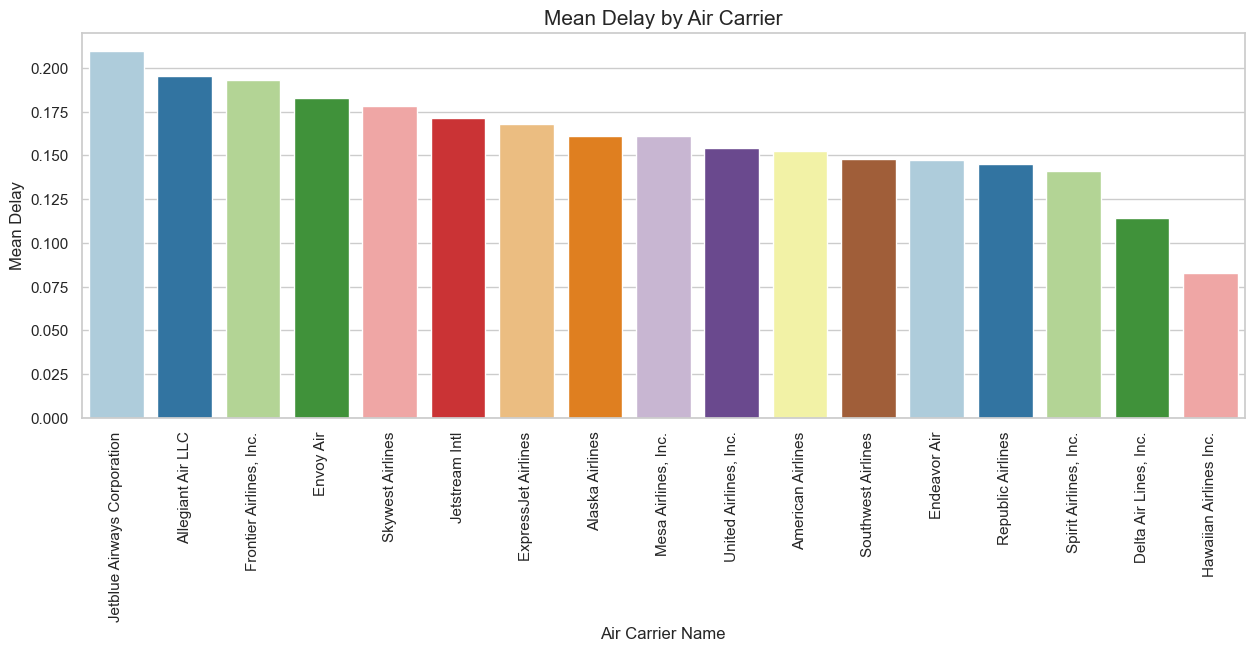

In [37]:
plt.figure(figsize=(15, 5))
sns.barplot(x=mean_delay_carrier.index, y=mean_delay_carrier.values, palette='Paired')

plt.xticks(rotation=90)

# Add title and labels
plt.title('Mean Delay by Air Carrier', fontsize=15)
plt.xlabel('Air Carrier Name')
plt.ylabel('Mean Delay')

# Show plot
plt.show()

In [39]:
mean_origin_delay = df.groupby('ORIGIN')['DEP_DEL15'].mean().sort_values(ascending=False).nlargest(10)
mean_origin_delay


ORIGIN
OGD    0.411765
HGR    0.409091
ART    0.382979
ASE    0.346365
OGS    0.344828
SLN    0.306667
LCK    0.305263
MEI    0.302013
PVU    0.294643
RIW    0.291667
Name: DEP_DEL15, dtype: float64

In [30]:
# Top 10 carriers in terms of flight volume
top_10_carriers = df['Air Carrier Name'].value_counts().nlargest(10)
print("Top 10 Carriers:")
print(top_10_carriers)

# Top 10 origin airports
top_10_origin_airports = df['ORIGIN'].value_counts().nlargest(10)
print("\nTop 10 Origin Airports:")
print(top_10_origin_airports)

# Top 10 destination airports
top_10_destination_airports = df['DEST'].value_counts().nlargest(10)
print("\nTop 10 Destination Airports:")
print(top_10_destination_airports)


Top 10 Carriers:
Air Carrier Name
Southwest Airlines             215212
Delta Air Lines, Inc.          153534
American Airlines              151097
Skywest Airlines               131804
United Airlines, Inc.           94322
Republic Airlines               53494
Envoy Air                       49126
Jetblue Airways Corporation     48154
Jetstream Intl                  46465
Endeavor Air                    42849
Name: count, dtype: int64

Top 10 Origin Airports:
ORIGIN
ATL    62944
ORD    48224
DFW    46648
CLT    38713
DEN    38479
LAX    35405
PHX    29789
IAH    29212
LAS    27157
LGA    27110
Name: count, dtype: int64

Top 10 Destination Airports:
DEST
ATL    62924
ORD    48118
DFW    46589
CLT    38655
DEN    38409
LAX    35337
PHX    29758
IAH    29134
LAS    27159
LGA    27118
Name: count, dtype: int64


In [40]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,Air Carrier Name
0,1,2,9E,3280,11953,GNV,10397,ATL,601.0,0,0600-0659,300.0,Endeavor Air
1,1,2,9E,3281,13487,MSP,11193,CVG,1359.0,0,1400-1459,596.0,Endeavor Air
2,1,2,9E,3282,11433,DTW,11193,CVG,1215.0,0,1200-1259,229.0,Endeavor Air
3,1,2,9E,3283,15249,TLH,10397,ATL,1521.0,0,1500-1559,223.0,Endeavor Air
4,1,2,9E,3284,10397,ATL,11778,FSM,1847.0,0,1900-1959,579.0,Endeavor Air


In [44]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,Air Carrier Name
0,1,2,9E,3280,11953,GNV,10397,ATL,601.0,0,0600-0659,300.0,Endeavor Air
1,1,2,9E,3281,13487,MSP,11193,CVG,1359.0,0,1400-1459,596.0,Endeavor Air
2,1,2,9E,3282,11433,DTW,11193,CVG,1215.0,0,1200-1259,229.0,Endeavor Air
3,1,2,9E,3283,15249,TLH,10397,ATL,1521.0,0,1500-1559,223.0,Endeavor Air
4,1,2,9E,3284,10397,ATL,11778,FSM,1847.0,0,1900-1959,579.0,Endeavor Air


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

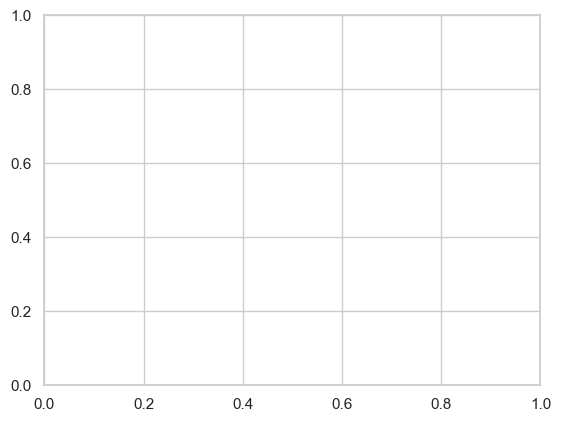

In [51]:
sns.histplot(x='DEP_TIME', data=df, bins=50, color='#E57C23')

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

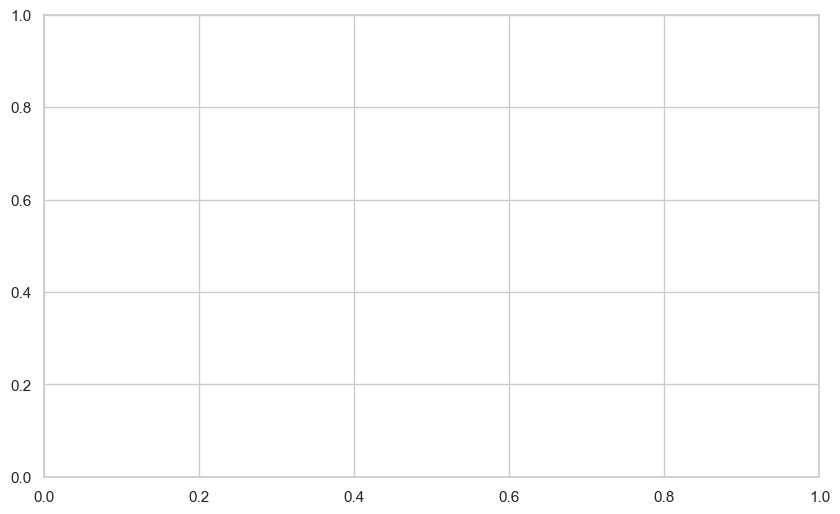

In [46]:
# List of numerical features to analyze
numerical_features = ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE']

# For each feature, create a separate histogram
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title('Distribution of ' + feature, fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()